# Pràctica amb ordinador 4. Filogènia mitocondrial d'hominins moderns i arcaics
## Preparació de l'ordinador
En esta pràctica utilitzarem els paquets `phangorn` i `Biostrings`. Si no estan intal·lats al teu ordinador, executa les ordres següents en un terminal:

> `install.packages('phangorn')`

> `install.packages('BiocManager')`

> `BiocManager::install('DECIPHER')`

I a continuació, carrega'ls:

In [ ]:
suppressMessages(library('phangorn'))
suppressMessages(library('DECIPHER'))

## Introducció
Al web [http://www.phylotree.org](http://www.phylotree.org) s'acumulen més de 24000 seqüències completes d'ADN mitocondrial humà. Tota la diversitat genètica mitocondrial de les poblacions humanes actuals pot classificar-se en uns pocs haplotips principals, la filogènia dels quals es reprodueix a la figura següent:

![](phylotree.png)

L'objectiu d'aquesta pràctica és utilitzar dades d'ADN mitocondrial per estudiar les relacions filogenètiques entre humans actuals i alguns dels nostres parents més pròxims, com els neandertals i els denisovans. A més, aplicarem la teoria de la coalescència a les dades per extreure informació sobre les diferents poblacions d'hominins.

Les dades es troben a l'arxiu `Denisovan_mtDNA.fasta` i són un alineament dels cromosomes mitocondrials complets de 9 humans moderns, 23 neandertals, 4 denisovans, un *Homo heidelbergensis*, 4 bonobos (*Pan paniscus*), 4 ximpanzés (*Pan troglodytes*) i un goril·la (que ens servirà d'*outgroup*).

## Reconstrucció filogenètica i calibratge del rellotge molecular
Igual que en la pràctica anterior, el bloc de codi següent carrega les seqüències (ja alineades) en la sessió de treball i les mostra en una pestanya nova del navegador:

In [ ]:
mtDNA <- readDNAStringSet('mtDNA.fasta')
BrowseSeqs(mtDNA, htmlFile = 'mtDNA.html', openURL = TRUE)

Per reconstruir la filogènia de les seqüències, podem estimar les distàncies genètiques entre elles amb un model d'evolució molecular i aplicar l'algoritme *neighbor joining*, que és eficient i suficientment acurat. Observa que la funció que estima les distàncies, `dist.dna()`, exigeix que transformem primer l'alineament en un objecte de tipus `DNAbin`:

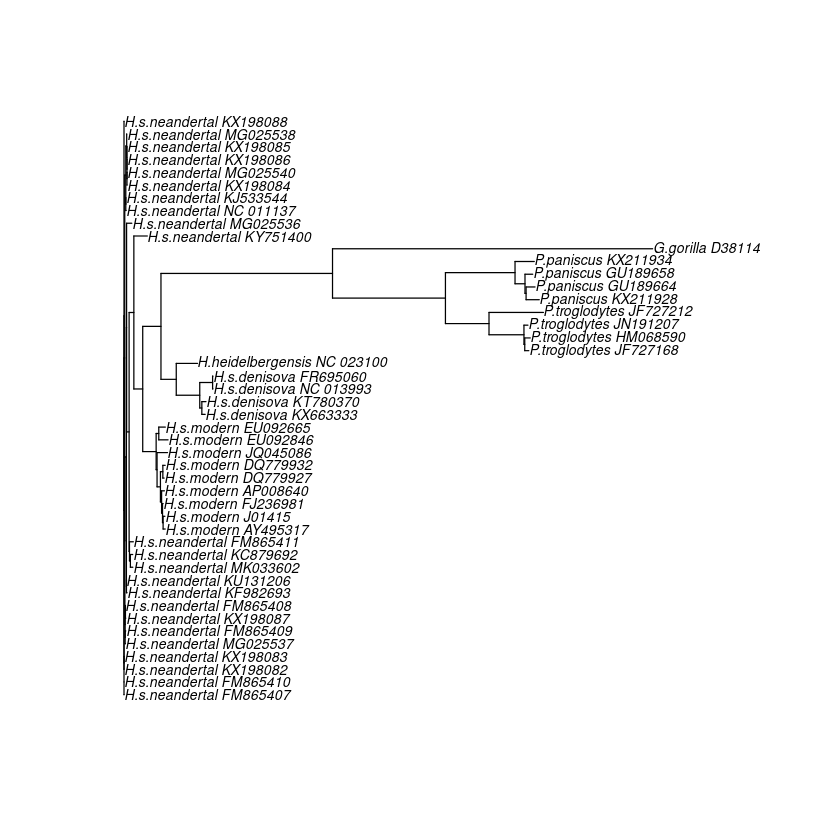

In [3]:
mtDNAb <- as.DNAbin(mtDNA)
distancies <- dist.dna(mtDNAb, model = 'K81')
arbre <- NJ(distancies)
plot(arbre, cex = 0.7)

El *neighbor-joining* produeix arbres *desarrelats*. Per visualitzar l'arbre més correctament podem indicar que la seqüència de goril·la (*G.gorilla_D38114*) és l'*outgroup*.

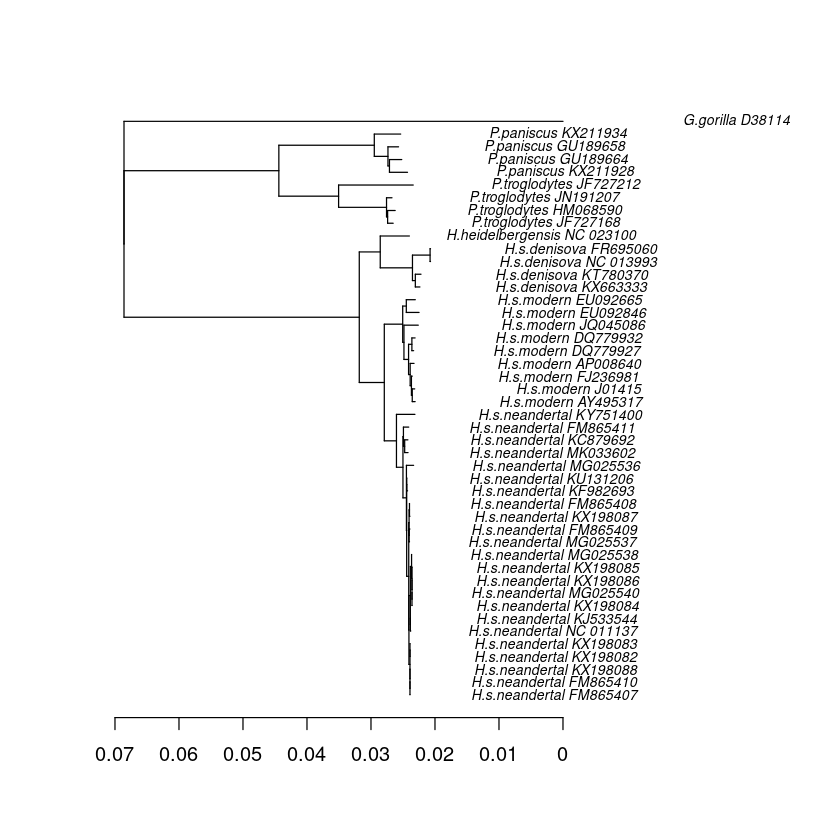

In [4]:
arbre <- root(arbre, outgroup = 'G.gorilla_D38114', resolve.root = TRUE)
plot(arbre, cex = 0.7, adj = 1, x.lim = c(0,0.1))
axisPhylo()

En arrelar l'arbre, les branques esdevenen *orientades*: el temps avança des de l'arrel cap a les puntes (o *fulles*). L'escala afegida amb la funció `axisPhylo()` ens indica el nombre mig de substitucions nucleotídiques per posició . Per exemple, al llarg de la branca més llarga, que connecta la seqüència de goril·la amb la de l'ancestre de la resta de seqüències s'han acumulat 0.07 mutacions per cada posició. Això equival a 7 mutacions per 100 nucleòtids, o a unes 1145 mutacions al llarg dels 16364 nucleòtids de la seqüència del goril·la.

Però l'arbre no és *ultramètric*: no sembla haver passat la mateixa quantitat de temps des de l'arrel fins qualsevol de les fulles, a pesar que moltes de les seqüències són contemporànies. El *neighbor-joining* no fa arbres ultramètrics (a diferència de l'UPGMA, per exemple). L'algoritme desconeix les edats de les seqüències i produeix longituds de branques proporcionals només als canvis nucleotídics. Naturalment, les branques només poden ser proporcionals al nombre de canvis *i al temps evolutiu* alhora si la taxa d'acumulació de substitucions és constant en tots els llinatges.

En qualsevol cas, podem ajustar la posició de l'*arrel* per tal d'alinear millor les fulles. La funció `rtt()` del paquet `ape` (carregat automàticament amb `phangorn`) arrela un arbre amb fulles *datades* en la posició més compatible possible amb la hipòtesi del **rellotge molecular**. Aquesta funció necessita que li proporcionem les dates de les seqüències de l'alineament, en l'ordre en què apareixen a l'alineament. La seqüència d'*Homo heidelbergensis* és de fa 400000 anys (Meyer et al. 2014). Les de neandertals i denisovans són de fa uns 40000 anys, i la resta són contemporànies.



In [ ]:
tipDates <- c(0, 0, 0, 0, 0, 0, 0, 0, 0,
              -400000,
               -50000, -50000, -150000, -110000, -43000, -50000, -124000,
              -115000, -50000,  -40000,  -43000, -40000, -40000,  -43000,
               -43000, -40000,  -40000,  -40000, -40000, -40000,  -40000,
               -43000, -43000,  -40000,  -40000, -43000, -40000,
              0, 0, 0, 0, 0, 0, 0, 0, 0)
arbre <- rtt(arbre, tip.dates = tipDates, objective = 'rms')
plot(arbre, cex = 0.7, adj = 1)
axisPhylo()

In [ ]:
nodeDates <- rep(NA, 91)
nodeDates[1:46] <- tipDates
nodeDates[48] <- -6500000
z <- estimate.dates(arbre, node.dates = nodeDates)
mu <- estimate.mu(arbre, node.dates = z)
mu

## Mida poblacional efectiva

## Taxa de mutació mitocondrial

# Bibliografia


- Meyer M, Fu Q, Aximu-Petri A, Glocke I, Nickel B, Arsuaga JL, Martínez I, Gracia A, de Castro JM, Carbonell E, Pääbo S. 2014. A mitochondrial genome sequence of a hominin from Sima de los Huesos. *Nature* 505(7483):403-6. doi: 10.1038/nature12788.

# Apèndix

 |   Espècie         |  Número d'accés |    Edat (anys) |   Referència          |  Nom                 |
 | ----------------- | --------------- | -------------- | --------------------- | -------------------- |
 | H.heidelbergensis |     NC_023100   |     400.000    | Meyer et al. 2014     | -                    |
 | H.s.denisova      |     NC_013993   |  30.000-48.000 | Krause et al. 2010    | Denisova 3 (falange) |
 | H.s.denisova      |     FR695060    |     >50.000?   | Reich et al. 2010     | Denisova 4 (molar)   |
 | H.s.denisova      |     KX663333    |     >100.000   | Slon et al. 2017      | Denisova 2 (dent)    |
 | H.s.denisova      |     KT780370    |     110.000?   | Sawyer et al. 2015    | Denisova 8 (molar)   |
 | H.s.neandertal    |     KX198082    |  45.630-43.910 | Rougier et al. 2016   | GoyetQ57-1           |
 | H.s.neandertal    |     KF982693    | 109.290-56.213 | Posth et al. 2017     | Okladnikov2          |
 | H.s.neandertal    |     KY751400    | 182.560-62.013 | Posth et al. 2017     | HST                  |
 | H.s.neandertal    |     MK033602    | 130.000-90.900 | Douka et al. 2019     | Denisova15           |
 | H.s.neandertal    |     KC879692    |        NA      |     No publicat       | -                    |
 | H.s.neandertal    |     FM865411    |  60.000-70.000 | Briggs et al. 2009    | Mezmaiskaya1         |
 | H.s.neandertal    |     KX198083    |  42.900-41.960 | Rougier et al. 2016   | GoyetQ57-3           |
 | H.s.neandertal    |     MG025536    |  43.740-42.720 | Hajdinjak et al. 2018 | Les Cottés Z4-1514   |
 | H.s.neandertal    |     KU131206    |      >50.000   | Brown et al. 2016     | DC1227               |
 | H.s.neandertal    |     KX198084    |  43.000-42.080 | Rougier et al. 2016   | GoyetQ56-1           |
 | H.s.neandertal    |     KX198088    |  41.800-40.620 | Rougier et al. 2016   | GoyetQ57-2           |
 | H.s.neandertal    |     FM865410    |        NA      | Briggs et al. 2009    | Vindija 33.25        |
 | H.s.neandertal    |     FM865407    |      40.000    | Briggs et al. 2009    | Feldhofer 1          |
 | H.s.neandertal    |     NC_011137   |      38.310    | Green et al. 2008     | Vindija 33.16        |
 | H.s.neandertal    |     KJ533544    |        NA      |     No publicat       | Vi 33.17             |
 | H.s.neandertal    |     MG025540    |  43.000-42.080 | Hajdinjak et al. 2018 | GoyetQ56-1           |
 | H.s.neandertal    |     MG025538    |  39.150-37.880 | Hajdinjak et al. 2018 | Spy-94a              |
 | H.s.neandertal    |     KX198086    |  47.057-33.134 | Posth et al. 2017     | GoyetQ305-7          |
 | H.s.neandertal    |     KX198085    |  46.942–32.697 | Posth et al. 2017     | GoyetQ374a-1         |
 | H.s.neandertal    |     MG025537    |  44.600-42.960 | Hajdinjak et al. 2018 | Mezmaiskaya2         |
 | H.s.neandertal    |     FM865409    |      39.000    | Briggs et al. 2009    | Sidron 1253          |
 | H.s.neandertal    |     KX198087    |  45.150-43.430 | Rougier et al. 2016   | GoyetQ305-4          |
 | H.s.neandertal    |     FM865408    |      49.000    | Briggs et al. 2009    | Feldhofer 2          |

## Bibliography

- Briggs, A.W. et al. 2009. *Science* 325(5938):318-21. [10.1126/science.1174462](https://doi.org/10.1126/science.1174462)
- Brown, S. et al. 2016. *Sci. Rep.* 6:23559. [10.1038/srep23559](https://doi.org/10.1038/srep23559)
- Douka, K. et al. 2019. *Nature* 565:640-644. [10.1038/s41586-018-0870-z](https://doi.org/10.1038/s41586-018-0870-z)
- Green, R.E. et al. 2008. *Cell* 134(3):416-426. [10.1016/j.cell.2008.06.021](https://doi.org/10.1016/j.cell.2008.06.021)
- Hajdinjak, M. et al. 2018. *Nature* 555(7698):652-656. [10.1038/nature26151](https://doi.org/10.1038/nature26151)
- Krause, J. et al.2010. *Nature* 464(7290):894-897 [10.1038/nature08976](https://doi.org/10.1038/nature08976)
- Meyer, M. et al. 2014. *Nature* 505(7483):403-406. [10.1038/nature12788](https://doi.org/10.1038/nature12788)
- Posth, C. et al. 2017. *Nat. Commun.* 8:16046. [10.1038/ncomms16046](https://doi.org/10.1038/ncomms16046)
- Reich, D. et al. 2010. *Nature* 468(7327):1053-60. [10.1038/nature09710](https://doi.org/10.1038/nature09710)
- Rougier, H. et al. 2016. *Sci. Rep.* 6:29005. [10.1038/srep29005](https://doi.org/10.1038/srep29005)
- Skoglund, P. et al. 2014. *Proc. Natl. Acad. Sci. U.S.A* 111(6):2229-2234. [10.1073%2Fpnas.1318934111](https://doi.org/10.1073%2Fpnas.1318934111)
- Sawyer, S. et al. 2015. *Proc. Natl. Acad. Sci. U.S.A.* 112(51):15696-15700. [10.1073/pnas.1519905112](https://doi.org/10.1073/pnas.1519905112)
- Slon, V. et al. 2017. *Sci. Adv.* 3:e1700186. [10.1126/sciadv.1700186](https://doi.org/10.1126/sciadv.1700186)
